In [2]:
import numpy as np

In [1]:
class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [3]:
mon = Momentum()

In [5]:
x = -7
y = 2

z = 1/20*x**2 + y**2

In [105]:
params = {"x":-7, "y":2}
momentum=0.9
lr = 0.01

x_list = []
y_list = []
for _ in range(2):
    if v == None:
        v = {}
        for key, val in params.items():
            v[key] = np.zeros_like(val)

    for key in params.keys():
        grads = gradient(params)
        # v[key] = momentum*v[key] - lr*grads[key] 
        v[key] = -lr*grads[key] 
        params[key] += v[key]
        
        if key == 'x':
            x_list.append(params[key])
        else:
            y_list.append(params[key])

In [99]:
x_list

[-6.9519667417263, -6.90173680927997]

In [101]:
y_list

[1.7347817554359999, 1.4613853353283999]

In [106]:
x_list

[-6.993, -6.986000000000001]

In [107]:
y_list

[1.96, 1.9208]

In [91]:
def gradient(param):
    grads = {}
    # backward
    for idx, (key, value) in enumerate(params.items()):
        dz = 1
        
        if idx == 0:
            grads[key] = round(1/10*value, 2)
        else:
            grads[key] = round(2*value, 2)
            
    return grads

In [87]:
params = {"x":-7, "y":2}
v = {}
for key, val in params.items():
    v[key] = np.zeros_like(val)

## 他の人の参考

### https://www.anarchive-beta.com/entry/2020/08/10/180000

In [108]:
# この項で利用するライブラリを読み込む
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# Momentumの実装
class Momentum:
    
    # インスタンス変数を定義
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr # 学習率
        self.momentum = momentum # vの調整項
        self.v = None # 速度
    
    # パラメータの更新メソッドを定義
    def update(self, params, grads):
        # vを初期化
        if self.v is None: # 初回のみ
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val) # 全ての要素が0
        
        # パラメータごとに値を更新
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] # 式(6.3)
            params[key] += self.v[key] # 式(6.4)
            
# 上記は本と同じ


In [110]:
# 式(6.2)
def f(x, y):
    return x ** 2 / 20.0 + y ** 2

# 式(6.2)の勾配(偏微分)
def df(x, y):
    # 偏微分
    dx = x / 10.0 # df / dx
    dy = 2.0 * y # df / dy
    return dx, dy # (値を2つ出力！)

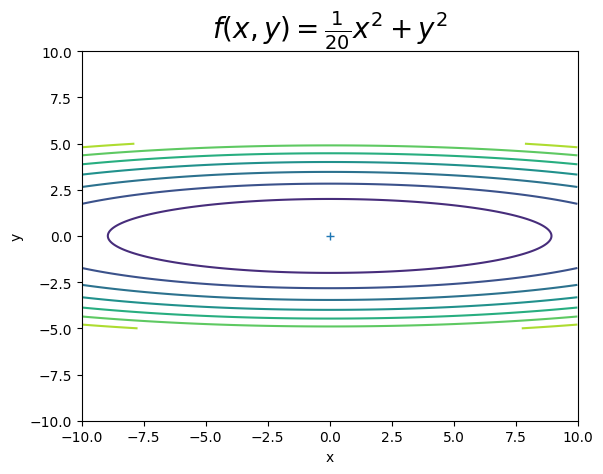

In [111]:
# 等高線用の値
x = np.arange(-10, 10, 0.01) # x軸の値
y = np.arange(-5, 5, 0.01) # y軸の値
X, Y = np.meshgrid(x, y) # 格子状の点に変換
Z = f(X, Y)

# 作図
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("$f(x, y) = \\frac{1}{20} x^2 + y^2$", fontsize=20) # タイトル
plt.show()

In [159]:
# パラメータの初期値を指定
params = {}
params['x'] = -7.0
params['y'] = 2.0

# 勾配の初期値を指定
grads = {}
grads['x'] = 0
grads['y'] = 0

# 学習率を指定
lr = 0.1

# モーメンタムを指定
momentum = 0.9

# インスタンスを作成
optimizer = Momentum(lr=lr, momentum=momentum)

In [160]:
# 試行回数を指定
iter_num = 30

# 更新値の記録用リストを初期化
x_history = []
y_history = []

# 初期値を保存
x_history.append(params['x'])
y_history.append(params['y'])

# 関数の最小値を探索
for _ in range(iter_num):
    
    # 勾配を計算
    grads['x'], grads['y'] = df(params['x'], params['y'])
    
    # パラメータを更新
    optimizer.update(params, grads)
    
    # パラメータを記録
    x_history.append(params['x'])
    y_history.append(params['y'])

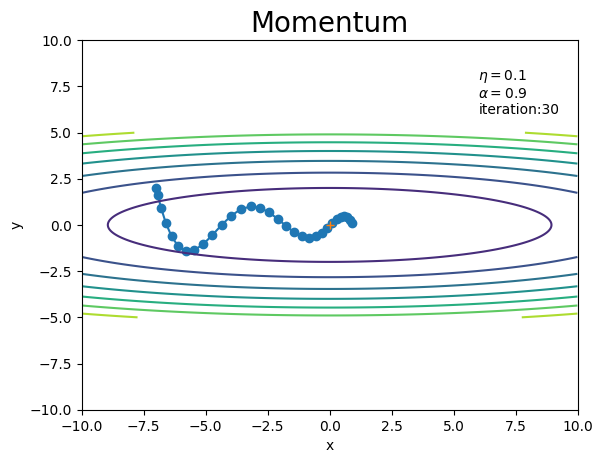

In [161]:
# 作図
plt.plot(x_history, y_history, 'o-') # パラメータの推移
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("Momentum", fontsize=20) # タイトル
plt.text(6, 6, "$\\eta=$" + str(lr) + "\n$\\alpha=$" + str(momentum) + "\niteration:" + str(iter_num)) # メモ
plt.show()

ゼロつくではSGDでは学習率0.95でmomentumでは学習率を0.01で行っているにもかかわらず、
同じ条件で実施している程で話しているから、違和感がある。
SGDではX軸にほぼ平坦であるので、すぐにy＝０で落ち着いてしまう。このため。momentumが良い仕事をしているのではと思う。